In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train =  pd.read_csv('/kaggle/input/random-linear-regression/train.csv')
test = pd.read_csv('/kaggle/input/random-linear-regression/test.csv')

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.isnull().any().any()
train.isnull().sum().sum()
train[train['y'].isnull()]

,x,y
213,3530.157369,NaN


In [6]:
train.dropna(inplace=True)
train.reset_index(drop=True, inplace=True)

In [5]:
mean=train['y'].mean()
train['y'].fillna(value=mean,inplace=True)

**Delete rows with missing value**


In [26]:
train = train.dropna(how='any')

In [55]:
train.isnull().any().any()

False

In [ ]:
# scaler = StandardScaler()

# scaler.fit(x_train)

# scaler.transform(x_train)
# scaler.transform(x_test)


In [ ]:
#model=LinearRegression()
#model.fit(x_train,y_train)

In [ ]:
#model.predict(x_test)

In [ ]:
#sns.jointplot(x='x',y='y',data=train,kind='hex')

In [7]:
train.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


Normalize the data

In [8]:
train_norm = (train-train.min())/(train.max()-train.min())
test_norm = (test-test.min())/(test.max()-test.min())

In [9]:
train_norm.head()
x_train=train_norm['x']
y_train=train_norm['y']



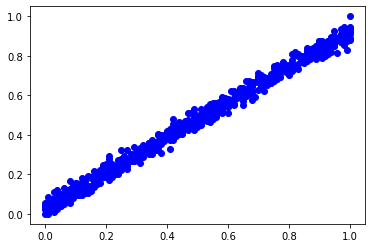

In [10]:
plt.scatter(x_train,y_train,c='blue')


In [46]:
y_train.isnull().any().any()

False

**Calculate mean squared function**

y=wx+b
w=weight 
b=constant

In [11]:
#mean squared cost fuction
def cost(x,y,w,b):
    n=x.shape[0]
    yhat=0.0
    diff=0.0
    for i in range(n):
        if i!=213:
            yhat=w*x[i]+b#function is linear as y=mx+c
            diff=diff+(yhat-y[i])**2
    diff=diff/(2*n)
    return diff

**until convergence: 
w=𝑤−𝛼∂𝐽(𝑤,𝑏)/∂𝑤,
b=𝑏−𝛼*∂𝐽(𝑤,𝑏)/∂𝑏*

∂𝐽(𝑤,𝑏)/∂𝑤=sum((f(x)-y)*x))/m
∂𝐽(𝑤,𝑏)/∂𝑏=sum(f(x)-y))/m

In [12]:
#calculate gradient
def calc_gradient(x,y,w,b):
    m=x.shape[0]
    yhat=0.0
    dj_dw=0.0
    dj_db=0.0
    for i in range(m):
        if i!=213:
            yhat=np.dot(w,x[i])+b
            # dj_dw=dj_dw+(yhat)
            # dj_db=dj_db+(yhat)
            dj_dw=dj_dw+(yhat-y[i])*x[i]
            dj_db=dj_db+(yhat-y[i])
    #         if(i%100==0):
    #             print(f'Found :{dj_dw,dj_db}')
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db

**until convergence: 
w=𝑤−𝛼∂𝐽(𝑤,𝑏)/∂𝑤,
b=𝑏−𝛼*∂𝐽(𝑤,𝑏)/∂𝑏*

In [13]:
def gradient_descent(x,y,w,b,pd_hist,w_hist,alpha,iter):
    dw=0.0
    db=0.0
    w_prev=0.0
    for i in range(iter):
        dw,db=calc_gradient(x,y,w,b)
        pd_hist.append(cost(x,y,w,b))
        w=w-alpha*dw
        if abs(w_prev-w)<0.00001:
            break
        w_prev=w
        w_hist.append(w)
        b=b-alpha*db            
        if (i%10==0):
            print(f'Caculating the weight and constant:{w,b}')
        
    return w,b,pd,w_hist

In [14]:
x_train=train_norm['x']
y_train=train_norm['y']
# x_train=np.array([1,2,3,4,8,9])
# y_train=np.array([10,20,30,40,80,90])
w=0.0
b=0.0
pd_hist=[]
w_hist=[]
iterations=8000
alpha=0.2
w_f,b_f,pd_hist,w_hist=gradient_descent(x_train,y_train,w,b,pd_hist,w_hist,alpha,iterations)
print(f'Found the weight and constant:{w_f,b_f}')

Caculating the weight and constant:(0.06234967890958899, 0.09517828506768494)
Caculating the weight and constant:(0.29445315775672926, 0.3299119961778574)
Caculating the weight and constant:(0.3751209579507111, 0.3061778306208815)
Caculating the weight and constant:(0.439147234025088, 0.2729907916786485)
Caculating the weight and constant:(0.49486867900198866, 0.24325234605709709)
Caculating the weight and constant:(0.5436550649259837, 0.2171685497302922)
Caculating the weight and constant:(0.586385443434306, 0.19432009772656078)
Caculating the weight and constant:(0.6238124266894177, 0.17430729932726943)
Caculating the weight and constant:(0.6565942815054135, 0.15677831702285197)
Caculating the weight and constant:(0.6853075254244753, 0.1414248856677537)
Caculating the weight and constant:(0.7104571206942663, 0.12797699429436257)
Caculating the weight and constant:(0.7324853577067196, 0.11619814317003138)
Caculating the weight and constant:(0.7517796334468024, 0.10588118492379796)
Cac

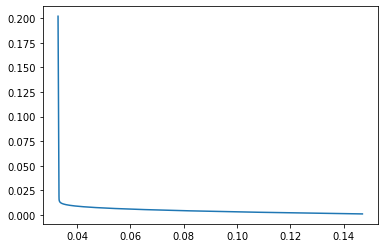

In [111]:
plt.plot(pd,w_hist)

In [166]:
print(f'Found he weight and constant:{w_f,b_f}')


Found he weight and constant:(0.8871991085898704, 0.033475538622828115)


In [167]:
x_test=test_norm['x']
y_test=test_norm['y']

c_y_test=w_f*x_test+b_f


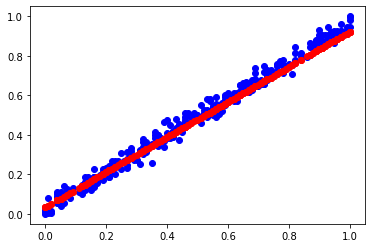

In [168]:
plt.scatter(x_test,y_test,c='blue')
plt.scatter(x_test,c_y_test,c='red')